#Mathematics behind the Synchronous and Asynchronous communication system

In [65]:
import numpy as np
import matplotlib.pyplot as plt

**Synchronous Communcation**

In [66]:
duration = 1
sampling_rate = 10000
frequency = 1

In [67]:
t = np.linspace(0,duration,int(sampling_rate*duration),endpoint=False)

In [68]:
transmission_signal = np.sin(2*np.pi*frequency*t)
reciever_signal = transmission_signal

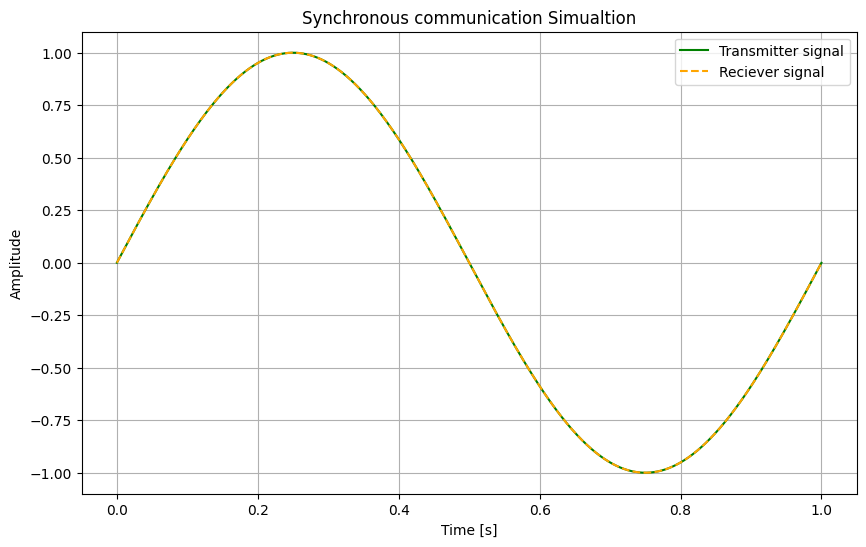

In [69]:
plt.figure(figsize=(10,6))
plt.plot(t,transmission_signal,label="Transmitter signal",color='green')
plt.plot(t,reciever_signal,label="Reciever signal",color="orange",linestyle='--')
plt.title("Synchronous communication Simualtion")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

**Implemention and working simulation**

In [70]:
clock_frequency = 10
data_bits = np.array([1,0,1,1,1,1,0,0,1,1])
bit_duration = 1/clock_frequency
sampling_rate = 1000

In [71]:
total_duration = len(data_bits)*bit_duration
t = np.linspace(0,total_duration,int(sampling_rate*total_duration))

In [72]:
clock_signal = 0.5 * (1+ np.sign(np.sin(2*np.pi*clock_frequency*t)))


In [73]:
transmitted_signal = np.zeros_like(t)
for i,bit in enumerate(data_bits):
   start_time = i*bit_duration
   end_time = i+1*bit_duration
   transmitted_signal[(t>=start_time) & (t<end_time)] = bit

In [74]:
sample_points = np.arange(bit_duration/2,total_duration,bit_duration)
recieved_signal =[]
for sample in sample_points:
  recieved_value = transmitted_signal[np.argmin(np.abs(t-sample))]
  recieved_signal.append(recieved_value)

recieved_signal = np.array(recieved_signal)

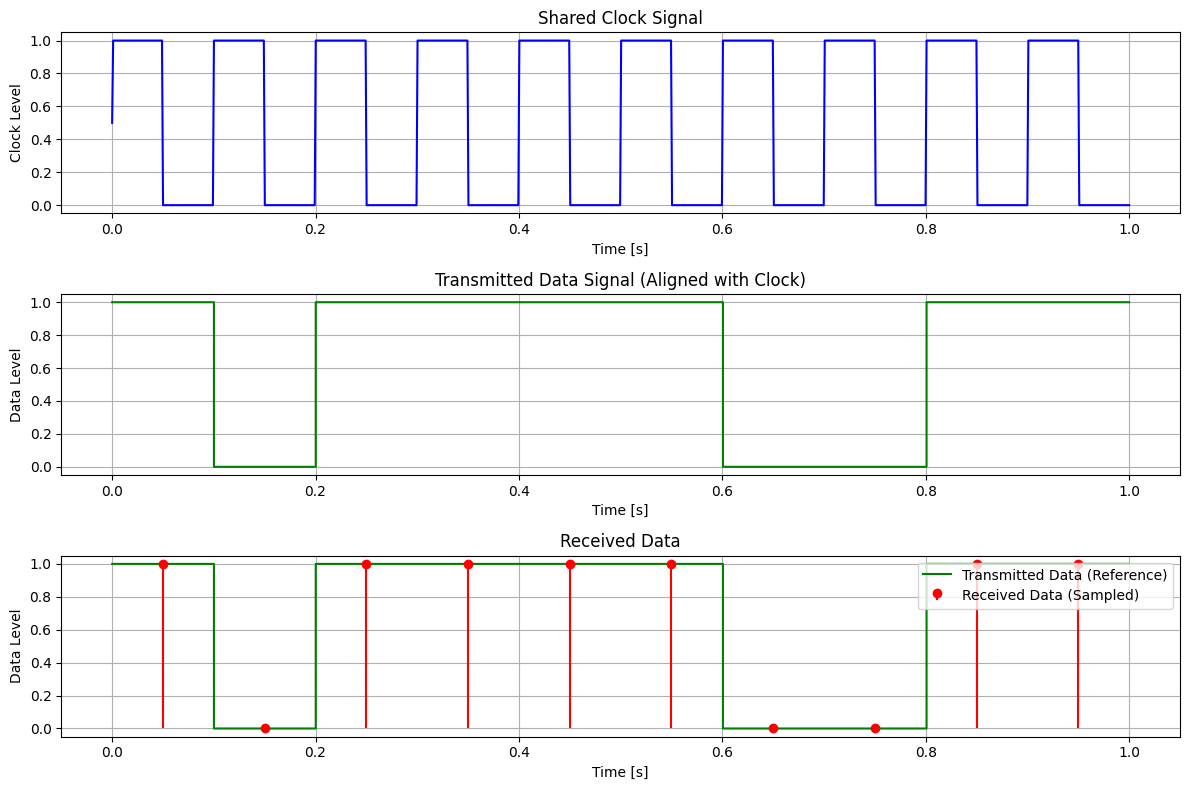

In [77]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, clock_signal, label='Clock Signal', color='blue')
plt.title('Shared Clock Signal')
plt.xlabel('Time [s]')
plt.ylabel('Clock Level')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.step(t, transmitted_signal, label='Transmitted Data', color='green', where='post')
plt.title('Transmitted Data Signal (Aligned with Clock)')
plt.xlabel('Time [s]')
plt.ylabel('Data Level')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.step(t, transmitted_signal, label='Transmitted Data (Reference)', color='green', where='post')
plt.stem(sample_points, recieved_signal, label='Received Data (Sampled)', linefmt='red', markerfmt='ro', basefmt=" ")
plt.title('Received Data')
plt.xlabel('Time [s]')
plt.ylabel('Data Level')
plt.legend(loc='upper right')
plt.grid(True)


plt.tight_layout()
plt.show()

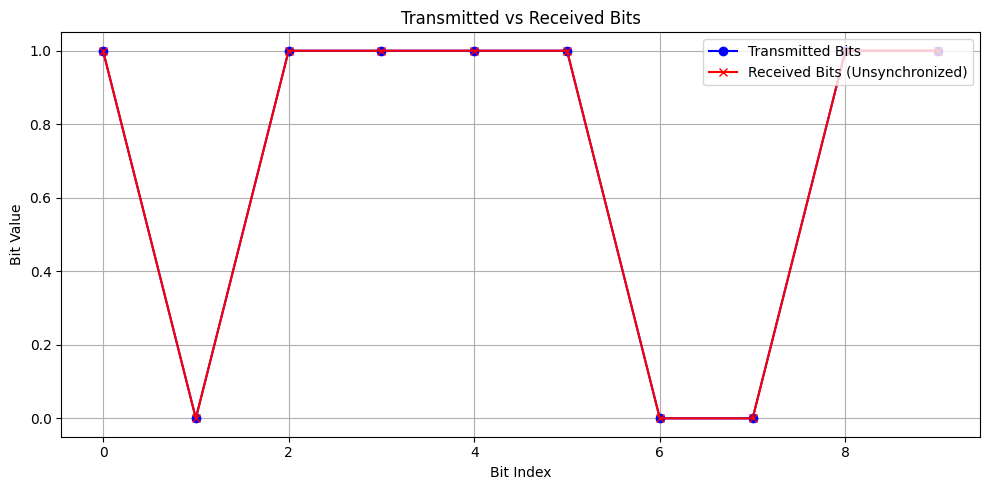

In [83]:
plt.figure(figsize=(10,5))

plt.plot(np.arange(len(data_bits)), data_bits, label='Transmitted Bits', marker='o', color='blue')
plt.plot(np.arange(len(recieved_signal)), recieved_signal, label='Received Bits (Unsynchronized)', marker='x', color='red')
plt.title('Transmitted vs Received Bits')
plt.xlabel('Bit Index')
plt.ylabel('Bit Value')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

**Asynchronous Communication (UART)**

**Implementaion and working simulation**

In [96]:
tx_baud_rate = 9600
tx_bit_duration = 1/tx_baud_rate
data_bits = np.array([1,0,1,1,1,1,0,0,1,1])
tx_total_duration = len(data_bits)*tx_bit_duration

In [97]:
rx_baud_rate = 9600 *1.05
rx_bit_duration = 1/rx_baud_rate
rx_total_duration = len(data_bits)*rx_bit_duration

In [98]:
sampling_rate = 1000
t = np.linspace(0,tx_total_duration,int(sampling_rate*tx_total_duration))

In [106]:
transmitted_signal = np.zeros_like(t)

for i,bit in enumerate(data_bits):
  start_point = i*tx_bit_duration

  end_point = (i+1)*tx_bit_duration
  transmitted_signal[(t>=start_point) & (t<end_point)] = bit

In [107]:
rx_sampling_points = np.arange(rx_bit_duration/2,tx_total_duration,rx_bit_duration)
recieved_signal = []
for i,sample in enumerate(rx_sampling_points):
   recieved_value = transmitted_signal[np.argmin(np.abs(t-sample))]
   recieved_signal.append(recieved_value)
recieved_signal = np.array(recieved_signal)

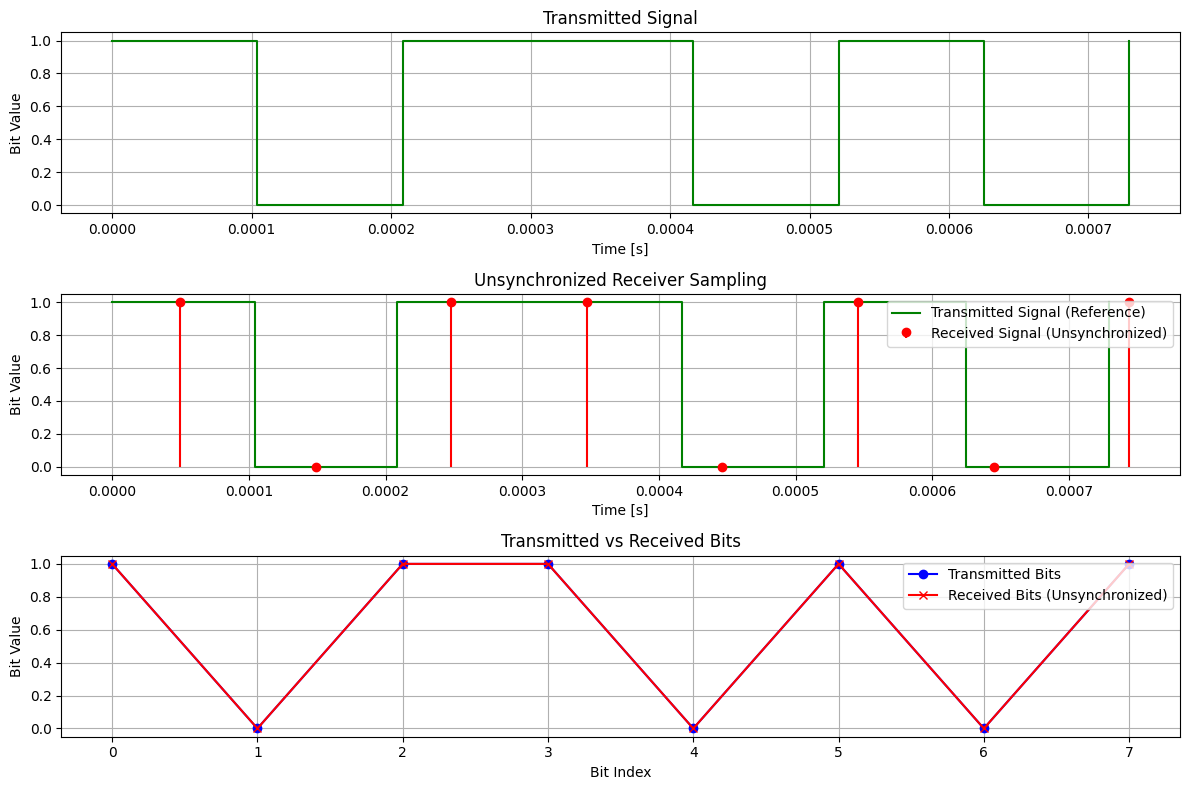

In [108]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.step(t, transmitted_signal, label='Transmitted Signal', color='green', where='post')
plt.title('Transmitted Signal')
plt.xlabel('Time [s]')
plt.ylabel('Bit Value')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.step(t, transmitted_signal, label='Transmitted Signal (Reference)', color='green', where='post')
plt.stem(rx_sampling_points, recieved_signal, label='Received Signal (Unsynchronized)', linefmt='red', markerfmt='ro', basefmt=" ")
plt.title('Unsynchronized Receiver Sampling')
plt.xlabel('Time [s]')
plt.ylabel('Bit Value')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(np.arange(len(data_bits)), data_bits, label='Transmitted Bits', marker='o', color='blue')
plt.plot(np.arange(len(recieved_signal)), recieved_signal, label='Received Bits (Unsynchronized)', marker='x', color='red')
plt.title('Transmitted vs Received Bits')
plt.xlabel('Bit Index')
plt.ylabel('Bit Value')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()